## Download Data

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Search parameters
search_terms = ['#StopAAPIHate','#AtlantaShooting','#StopAsianHateCrimes']
search_start_date = '2020-01-01'
search = ' OR '.join(search_terms)+f' since:{search_start_date}'

# Loop through tweets and build up a pandas dataframe of them
tweets = []
batch_num = 1
try:
    for i,item in enumerate(sntwitter.TwitterSearchScraper(search).get_items()):

        # Save items from that specific tweet
        tweet = {
            'url': item.url, 
            'date': item.date,  
            'content': item.content,
            'coordinates':item.coordinates,
            'place':item.place,
            'renderedContent': item.renderedContent,
            'id': item.id,  
            'username': item.user.username,
            'user': item.user, 
            'replyCount': item.replyCount,  
            'retweetCount': item.retweetCount,  
            'likeCount': item.likeCount,
            'quoteCount': item.quoteCount,
            'conversationId': item.conversationId,
            'lang': item.lang,  
            'source': item.source,  
            'sourceLabel':item.sourceLabel,
            'sourceUrl':item.sourceUrl,
            'retweetedTweet': item.retweetedTweet,
            'quotedTweet': item.quotedTweet,
            'outlinks': [item.outlinks],  
            'tcooutlinks': [item.tcooutlinks],  
            'media': [item.media],
            'mentionedUsers': [item.mentionedUsers]
        }
        tweets.append(tweet)

        if (i+1) % 1000 == 0:
            print(f'Finished {i+1} tweets...')    

        if (i+1) % 10000 == 0:

            # Save this batch to CSV
            pd.DataFrame(tweets).to_csv(f'data/tweets_{batch_num}.csv')
            print(f'Saved batch {batch_num} to CSV')

            # Reset for next batch
            tweets     = []
            batch_num += 1
            
except sntwitter.ScraperException:
    pd.DataFrame(tweets).to_csv(f'data/tweets_{batch_num}.csv')

## Process Data

In [66]:
import os
import pandas as pd

df = pd.DataFrame()
for file in os.listdir("data"):
    if file.endswith(".csv"):
        curr_df = pd.read_csv(os.path.join("data", file), index_col=0)
        df = pd.concat((df,curr_df))
df.shape

(395518, 24)

In [70]:
df.columns

Index(['url', 'date', 'content', 'coordinates', 'place', 'renderedContent',
       'id', 'username', 'user', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'conversationId', 'lang', 'source', 'sourceLabel',
       'sourceUrl', 'retweetedTweet', 'quotedTweet', 'outlinks', 'tcooutlinks',
       'media', 'mentionedUsers'],
      dtype='object')

In [67]:
# Drop non-English tweets
print(df['lang'].value_counts().head(10))
df = df[df['lang'] == 'en']
df.shape

en     246014
und     91818
es      22469
pt       7308
ko       6982
tr       4589
ja       3189
th       3024
in       2909
ar       1467
Name: lang, dtype: int64


(246014, 24)

2021-03-30    140440
2021-03-18     15274
2021-03-17     12964
2021-04-11      8528
2021-03-19      7291
               ...  
2020-09-20         1
2021-01-15         1
2020-12-12         1
2021-01-17         1
2020-11-27         1
Name: date, Length: 305, dtype: int64


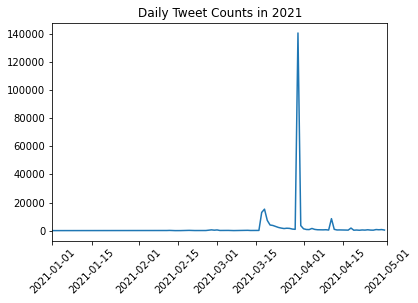

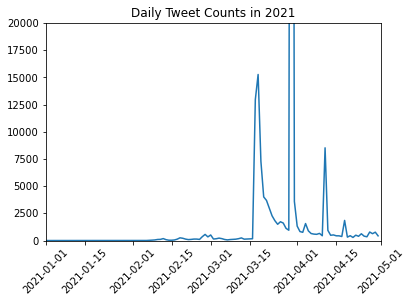

In [65]:
import matplotlib.pyplot as plt

# Get frequency counts by date
dates = pd.to_datetime(df['date']).dt.date
dates_count = dates.value_counts().sort_index()
print(dates.value_counts())

# Plot results
plt.plot(dates_count.index, dates_count)
plt.title("Daily Tweet Counts in 2021")
plt.xlim(['2021-01-01','2021-05-01'])
plt.xticks(rotation=45)
plt.show()

# Plot results
plt.plot(dates_count.index, dates_count)
plt.title("Daily Tweet Counts in 2021")
plt.ylim([0, 20000])
plt.xlim(['2021-01-01','2021-05-01'])h
plt.xticks(rotation=45)
plt.show()